In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Reframed_Student_Dropout_rate.csv')

# Display the first few rows of the dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

**Step 1: Exploratory Data Analysis (EDA)**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_statistics = df.describe()

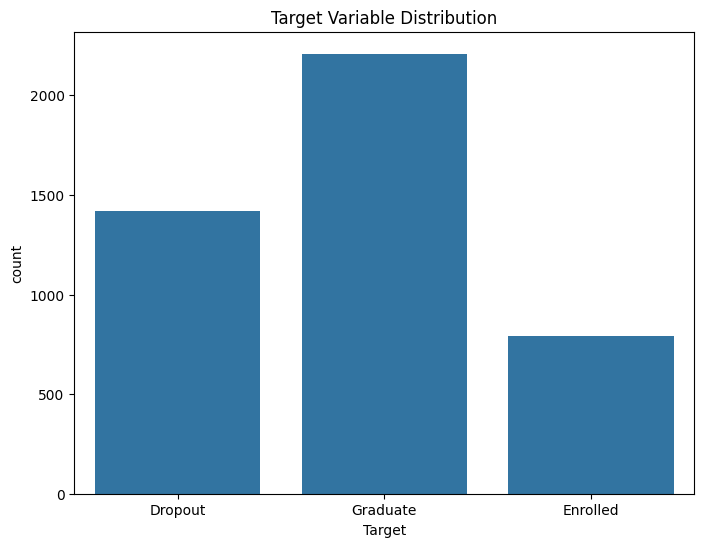

In [5]:
# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target')
plt.title('Target Variable Distribution')
plt.show()

In [6]:
missing_values, summary_statistics

(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance\t                      0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                           

**Step 2: Splitting the Dataset and Data Preprocessing**


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the dataset into features and target variable
X = df.drop('Target', axis=1)  # Replace 'Target' with the actual target column name
y = df['Target']  # Replace 'Target' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3: Implementing The Models**


**Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



**K-Nearest Neighbors (KNN)**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       316
           1       0.37      0.28      0.32       151
           2       0.72      0.87      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.70      0.69       885



**K-Means Clustering**

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(f'/content/Reframed_Student_Dropout_rate.csv')

# Display the first few rows of the dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


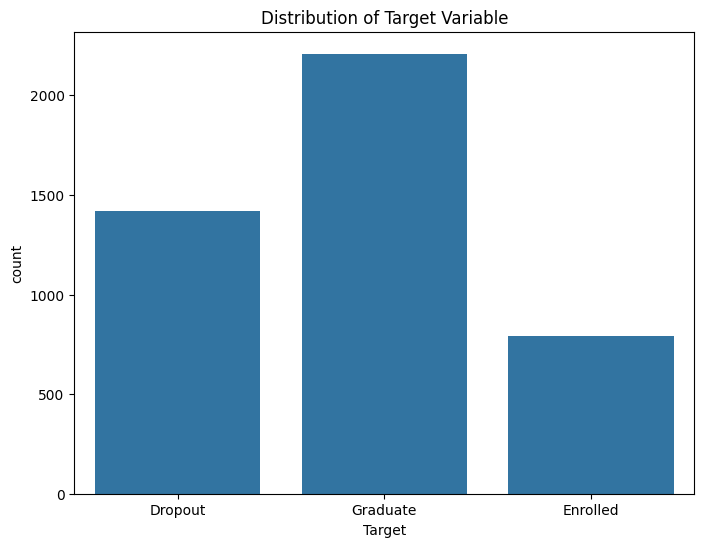

(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance\t                      0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                           

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics
descriptive_stats = df.describe()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

missing_values, descriptive_stats

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])  # 0 for Dropout, 1 for Graduate

# Select features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled, y

(array([[-0.29482875, -0.09547022,  2.49089589, ..., -0.28763846,
          0.12438647,  0.76576084],
        [-0.29482875, -0.20986898, -0.55406775, ...,  0.87622207,
         -1.10522155,  0.34719942],
        [-0.29482875, -1.01066035,  2.49089589, ..., -0.28763846,
          0.12438647,  0.76576084],
        ...,
        [-0.29482875, -1.01066035, -0.55406775, ...,  0.87622207,
         -1.10522155,  0.34719942],
        [-0.29482875, -1.01066035, -0.55406775, ..., -0.81325289,
         -1.46687097, -1.37551124],
        [-0.29482875, -0.4958659 , -0.55406775, ...,  0.42569541,
          1.7879738 , -0.74987207]]),
 0       0
 1       2
 2       0
 3       2
 4       2
        ..
 4419    2
 4420    0
 4421    0
 4422    2
 4423    2
 Name: Target, Length: 4424, dtype: int64)

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3096, 36), (1328, 36), (3096,), (1328,))

In [14]:
from sklearn.cluster import KMeans

# Train the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict on the test set
y_pred = kmeans.predict(X_test)

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Map the clusters to the actual labels
cluster_map = {0: 1, 1: 0}  # Assuming cluster 0 maps to Dropout and cluster 1 maps to Graduate
y_pred_mapped = [cluster_map[cluster] for cluster in y_pred]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_mapped)
accuracy = accuracy_score(y_test, y_pred_mapped)

conf_matrix, accuracy

(array([[213, 228,   0],
        [ 21, 224,   0],
        [ 22, 620,   0]]),
 0.32906626506024095)